Импорт библиотек

In [646]:
#!pip install geopy

In [647]:
#!pip install nltk

In [1]:
#!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9696 sha256=0219bb0e120801b04a9077cccfe05bf96066e35612087d30e4bd1267381b35fe
  Stored in directory: c:\users\anastasyya\appdata\local\pip\cache\wheels\8b\f1\7f\5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [9]:
!pip install gdown

ERROR: Could not install packages due to an OSError: [WinError 2] Не удается найти указанный файл: 'C:\\Python310\\Scripts\\gdown.exe' -> 'C:\\Python310\\Scripts\\gdown.exe.deleteme'



In [1]:
import requests
import gdown
import wget
import re
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import shapiro, spearmanr, pearsonr, normaltest
from IPython.display import display

# Кодирование признаков
import category_encoders as ce

# Визуализация признаков
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
# Обработка естественного языка
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Машинное обучение
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import f_classif, chi2
# Получение координат по адресу
from geopy.geocoders import Nominatim
from functools import partial

константы

 Определение функций

In [2]:
def search_null_values(df):
    """Функция по определению пропусков в признаках

    Args:
        df (DataFrame): ДатаФрейм, в котором необходимо 
        обнаружить пропуски
    """
    null_cols = df.isnull().sum()

    if null_cols.mean() > 0:
        print('Количество пропусков в признаках:')
        display(null_cols[null_cols > 0])
    else:
        print('Пропусков не обнаружено')
        
        
def clean_tags(arg):
    """Функция по очистке тегов и приведения их к списку

    Args:
        arg (str): Исходная строка для преобразования

    Returns:
        list: Очищенный список тегов
    """
    tmp = arg.replace("[' ", "").replace(" ']", '')
    tag_list = tmp.split(" ', ' ")
    
    return tag_list


def get_number_of_nights(arg):
    """Функция по извлечению количества проведенных
    ночей из тегов в отдельный признак.

    Args:
        arg (list): Список тегов

    Returns:
        int: Количество проведенных ночей
    """
    stayed_n_nights = r'Stay.*\s.*\snight.*'
    
    for el in arg:
        if re.findall(stayed_n_nights, el):
            return el.split()[1]

Подгрузка данных

In [1]:
url = 'https://drive.google.com/u/0/uc?id=1Qj0iYEbD64eVAaaBylJeIi3qvMzxf2C_&export=download'
output = 'E:/DataScience/training/Projects/PROJECT_EDA/data/hotels.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1Qj0iYEbD64eVAaaBylJeIi3qvMzxf2C_&export=download
From (redirected): https://drive.google.com/uc?id=1Qj0iYEbD64eVAaaBylJeIi3qvMzxf2C_&export=download&confirm=t&uuid=85eaaa6a-7429-49ac-a465-d4897f556301
To: E:\DataScience\training\Projects\PROJECT_EDA\data\hotels.csv
100%|██████████| 178M/178M [00:17<00:00, 10.0MB/s] 


'E:/DataScience/training/Projects/PROJECT_EDA/data/hotels.csv'

In [3]:
#hotels = pd.read_csv('data/hotels.csv')
# Датасет для манипуляций
data = hotels.copy()



In [4]:
print('Датасет для манипуляций')
display(data.head(2))

#print('Датасет для обучения')
#display(df_train.head(1))

#print('\nДатасет для предсказания')
#display(df_test.head(1))

Датасет для манипуляций


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [653]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Проверим, в каком виде представлены текстовые признаки

In [654]:
# Создадим списк признаков, с типом Object
object_columns = [s for s in data.columns if data[s].dtypes == 'object']

print(f'Признаки, с типом Object: {object_columns}')

Признаки, с типом Object: ['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'days_since_review']


Посмотрим на первую запись каждого признака

In [655]:
for col in object_columns:
    print(col)
    print(f'|{data[col][0]}|\n')

hotel_address
|Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom|

review_date
|2/19/2016|

hotel_name
|The May Fair Hotel|

reviewer_nationality
| United Kingdom |

negative_review
| Leaving |

positive_review
| Staff were amazing|

tags
|[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']|

days_since_review
|531 day|



В признаках reviewer_nationality, negative_review, positive_review присутсвуют лишние пробелы в начале и конце строки, необходимо их удалить.
Признак tags так же имеет некорректное форматирование, его преобразуем в разделе обработки тегов.

In [656]:
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x.strip())
data['negative_review'] = data['negative_review'].apply(lambda x: x.strip())
data['positive_review'] = data['positive_review'].apply(lambda x: x.strip())

Поиск дубликатов

создадим признак "duplicates", в котором будут помечены дублирующиеся записи

In [657]:
dupl_columns = list(data.columns)

mask = data.duplicated(subset=dupl_columns)
data_duplicates = data[mask]
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

# Создание признака с пометкой о дублировании записи
data['duplicates'] = data.duplicated(subset=dupl_columns)

# Приведение признака к числовому виду
data['duplicates'] = data['duplicates'].apply(lambda x: 1 if x else 0)

Число найденных дубликатов: 307


In [658]:
display(data['duplicates'].value_counts())

0    386496
1       307
Name: duplicates, dtype: int64

Определение признаков с пропусками данных

In [659]:
# Выполним функцию по поиску пропускав в данных
search_null_values(data)

Количество пропусков в признаках:


lat    2448
lng    2448
dtype: int64

Пропуски присутствуют только в двух признаках "lat" и "lng". Посмотрим к каким отелям они относятся

In [660]:
display(data[data['lat'].isna()][['hotel_address', 'hotel_name', 'lat', 'lng']].head())

,hotel_address,hotel_name,lat,lng
122,Savoyenstra e 2 16 Ottakring 1160 Vienna Austria,Austria Trend Hotel Schloss Wilhelminenberg Wien,NaN,NaN
566,23 Rue Damr mont 18th arr 75018 Paris France,Holiday Inn Paris Montmartre,NaN,NaN
724,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...,Fleming s Selection Hotel Wien City,NaN,NaN
754,W hringer Stra e 33 35 09 Alsergrund 1090 Vien...,Hotel Atlanta,NaN,NaN
1137,4 rue de la P pini re 8th arr 75008 Paris France,Maison Albar Hotel Paris Op ra Diamond,NaN,NaN


Преобразование признаков
 Обработка адреса отеля

Извлекаем из адреса отеля название страны и города, для того, чтобы заменить недостающие координаты отелей, координатами городов

Извлекаем из адреса отеля название страны и города

In [661]:
data['country'] = data['hotel_address'].apply(lambda x: x.split(' ')[-1])
data['city'] = data['hotel_address'].apply(lambda x: x.split(' ')[-2])

display(data[['hotel_address', 'country', 'city']])

,hotel_address,country,city
0,Stratton Street Mayfair Westminster Borough Lo...,Kingdom,United
1,130 134 Southampton Row Camden London WC1B 5AF...,Kingdom,United
2,151 bis Rue de Rennes 6th arr 75006 Paris France,France,Paris
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,France,Paris
4,Molenwerf 1 1014 AG Amsterdam Netherlands,Netherlands,Amsterdam
...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,Kingdom,United
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,Austria,Vienna
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,Kingdom,United
386801,31 Great Cumberland Place Westminster Borough ...,Kingdom,United


Cтрана "United Kingdom" и город "London" извлечены некорректно, исправим это

In [662]:
data['country'] = data['country'].apply(lambda x:'United Kingdom' if x == 'Kingdom' else x)
data['city'] = data['city'].apply(lambda x:'London' if x == 'United' else x)

display(data[['hotel_address', 'country', 'city']])

,hotel_address,country,city
0,Stratton Street Mayfair Westminster Borough Lo...,United Kingdom,London
1,130 134 Southampton Row Camden London WC1B 5AF...,United Kingdom,London
2,151 bis Rue de Rennes 6th arr 75006 Paris France,France,Paris
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,France,Paris
4,Molenwerf 1 1014 AG Amsterdam Netherlands,Netherlands,Amsterdam
...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,United Kingdom,London
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,Austria,Vienna
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,United Kingdom,London
386801,31 Great Cumberland Place Westminster Borough ...,United Kingdom,London


Страна и город заменены корректно, можно добавить признак "hotel_address" в список для удаления

In [663]:
# Создадим список для удаления признаков, 
# который будем пополнять по ходу обработки данных
drop_list = list()

drop_list.append('hotel_address')

Добавим признак населения страны и города

In [664]:
# Население страны в 2023 году
country_population = {
    'United Kingdom': 67703939, 'Netherlands': 17433745, 'France': 64693000,
    'Spain': 47541000 , 'Italy': 58786000, 'Austria': 8950000
}

data['country_population'] = data['country'].map(country_population)

display(data.head(2))
# Население города в 2023 году
сity_population = {
    'Paris': 11208440, 'London': 9648110, 'Milan': 3250588,
    'Vienna': 1975271, 'Barcelona': 5687356, 'Amsterdam': 1174025
}

data['сity_population'] = data['city'].map(сity_population)

# Посчитаем разницу между населением города и страны
data['population_diff'] = data['сity_population'] / data['country_population']

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,duplicates,country,city,country_population
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,0,United Kingdom,London,67703939
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,0,United Kingdom,London,67703939


In [665]:
display(data[['country_population', 'сity_population', 'population_diff']].head())

,country_population,сity_population,population_diff
0,67703939,9648110,0.142504
1,67703939,9648110,0.142504
2,64693000,11208440,0.173256
3,64693000,11208440,0.173256
4,17433745,1174025,0.067342


Обработка координат отелей

Посмотрим, в каких городах отсутствуют координаты отелей

In [666]:
missing_coordinates = data[(data['lat'].isna()) & (data['lng'].isna())]['city']

display(missing_coordinates.value_counts())

Vienna       1990
Paris         299
Barcelona     159
Name: city, dtype: int64

In [667]:
# Сохраним названия городов без координат в список
city_names = list(missing_coordinates.unique())

In [668]:
geolocator = Nominatim(user_agent='USER_AGENT')

for name in city_names:
    geocode = partial(geolocator.geocode, language="en")
    location = geolocator.geocode(name)
    print(str(geocode(name)).split(',')[0])
    
    # Так как координаты в датасете имеют длину в 9-10 символов, проводим
    # проверку на длину полученных координат и ограничиваем 10-ю символами
    if len(str(location.latitude)) > 10 or len(str(location.longitude)) > 10:
        lat = float(str(location.latitude)[:10])
        lng = float(str(location.longitude)[:10])
    else:
        lat = location.latitude
        lng = location.longitude
    
    # Замена пустых значений на координаты текущего города.
    data['lat'] = np.where(((data['lat'].isna()) & (data['city'] == name)), lat, data['lat']).astype('float64')
    data['lng'] = np.where(((data['lng'].isna()) & (data['city'] == name)), lng, data['lng']).astype('float64')
    print(lat, lng)

Vienna
48.2083537 16.3725042
Paris
48.8534951 2.3483915
Barcelona
41.3828939 2.1774322


Повторно проверяем датасет на наличие пропусков

In [669]:
search_null_values(data)

Пропусков не обнаружено


Посмотрим на количество стран и городов в датасете

In [670]:
print(f'Количество стран: {data["country"].nunique()}')
print(f'Количество городов: {data["city"].nunique()}')

Количество стран: 6
Количество городов: 6


In [671]:
display(data['country'].value_counts(ascending=False))

United Kingdom    196774
Spain              45132
France             44830
Netherlands        43006
Austria            29178
Italy              27883
Name: country, dtype: int64

Так как стран и городов немного, закодируем каждый город и страну в отдельный признак

In [672]:
categorical_columns_names = ['city', 'country']

In [673]:
data = pd.get_dummies(data, columns = categorical_columns_names, prefix=None)

In [674]:
data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,duplicates,country_population,сity_population,population_diff,city_Amsterdam,city_Barcelona,city_London,city_Milan,city_Paris,city_Vienna,country_Austria,country_France,country_Italy,country_Netherlands,country_Spain,country_United Kingdom
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,0,67703939,9648110,0.142504,0,0,1,0,0,0,0,0,0,0,0,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,0,67703939,9648110,0.142504,0,0,1,0,0,0,0,0,0,0,0,1


In [675]:
list(data.columns.values)

['hotel_address',
 'additional_number_of_scoring',
 'review_date',
 'average_score',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'positive_review',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'tags',
 'days_since_review',
 'lat',
 'lng',
 'duplicates',
 'country_population',
 'сity_population',
 'population_diff',
 'city_Amsterdam',
 'city_Barcelona',
 'city_London',
 'city_Milan',
 'city_Paris',
 'city_Vienna',
 'country_Austria',
 'country_France',
 'country_Italy',
 'country_Netherlands',
 'country_Spain',
 'country_United Kingdom']

Обработка даты

In [676]:
#Приведение признака к формату datetime
data['review_date'] = pd.to_datetime(data['review_date'], yearfirst=False)

# Создадим признак месяца
data['review_month'] = data['review_date'].dt.month.astype('int')

display(data[['review_date', 'review_month']].head())

,review_date,review_month
0,2016-02-19,2
1,2017-01-12,1
2,2016-10-18,10
3,2015-09-22,9
4,2016-03-05,3


Данные извлечены корректно, можно добавить признаки "country", "city", "review_date" в список для удаления

In [677]:
#drop_list.append('country')
#drop_list.append('city')
drop_list.append('review_date')

Посмотрим, на месяцы с наибольшей и наименьшей средней оценкой пользователей

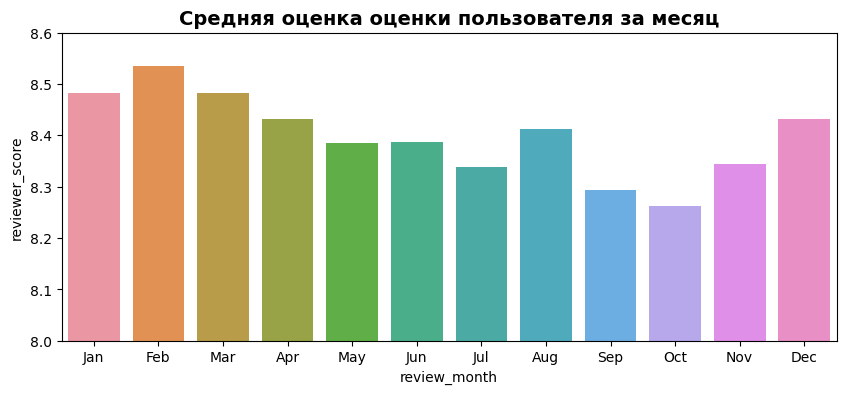

In [678]:
# построим сводную таблицу со средним значением 
# отзывов пользователей для каждого месяца

reviewer_score_month = data.pivot_table(
    values='reviewer_score', 
    index='review_month', 
    aggfunc='mean').reset_index()

# Строим график
plt.figure(figsize=(10, 4))

barplot = sns.barplot(
    data = reviewer_score_month,
    x = 'review_month', 
    y = 'reviewer_score')
barplot.set_title('Средняя оценка оценки пользователя за месяц', fontweight='bold', fontsize=14)
barplot.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Ограничим диапазон оценки для большей наглядности
barplot.set(ylim=(8, 8.6));


Мы видим, что наивысшие средние оценки пользователи ставили в конце зимы, в начале весны. По всей видимости в холодное время года люди более склонны к отпускам в теплые страны. Осенью: в сентябре и октябре, наблюдаются более низкие оценки, возможно из-за более высокой температуры воздуха, что снижает комфорт от отдыха и вызывает большее раздражение.

Обработка среднего балла отеля

Проверим, связаны ли между собой признаки "average_score" и "reviewer_score"

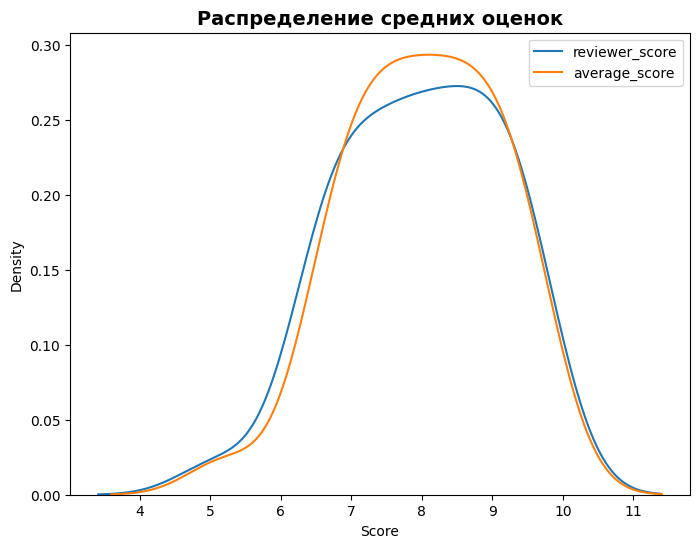

In [679]:
# Создадим сводную таблицу со средними значениями признаков для тренировочной выборки
train_data_score = data.pivot_table(
    values='reviewer_score', 
    index='average_score', 
    aggfunc='mean').reset_index()


# Построим график
fig, (ax) = plt.subplots(figsize=(8, 6))

sns.kdeplot(train_data_score['reviewer_score'], ax=ax, label='reviewer_score')
sns.kdeplot(train_data_score['average_score'], ax=ax, label='average_score')
ax.set_title('Распределение средних оценок', fontweight='bold', fontsize=14)
ax.set_xlabel('Score')
ax.legend();

Исходя из графика распределения, предположим, что признаки распределены нормально. Проверим гипотезу о нормальности распределения обоих признаков с помощью критерия Шапиро-Уилка.

In [680]:
# Определяем гипотезы для проверки
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

alpha = 0.05

_, p = shapiro(train_data_score['reviewer_score'])
print('reviewer_score p-value = %.3f' % p)
if p > alpha:
    print(H0, '\n')
else:
    print(Ha, '\n')


_, p = shapiro(train_data_score['average_score'])
print('average_score p-value = %.3f' % p)
if p > alpha:
    print(H0)
else:
    print(Ha)
    print( (Ha, H0) [ p > alpha] )

reviewer_score p-value = 0.294
Данные распределены нормально 

average_score p-value = 0.599
Данные распределены нормально


Поскольку данные распределены нормально, посмотрим на корреляцию Пирсона

In [681]:
display(train_data_score.corr())

,average_score,reviewer_score
average_score,1.000000,0.998163
reviewer_score,0.998163,1.000000


Коеффициент корреляции очень высокий. Это говорит о том, что признаки имеют очень сильную связь. Следовательно, признаки имеют зависимость между собой. Проверим эту гипотезу

In [682]:
# Определяем гипотезы для проверки
H0 = 'Нет зависимости между средним баллом отеля и оценкой пользователя.'
Ha = 'Есть зависимость между средним баллом отеля и оценкой пользователя.'

corr, p = pearsonr(train_data_score['reviewer_score'], train_data_score['average_score'])

if p > alpha:
    print(f"{round(p, 2)} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутствии зависимости между признаками - {H0}")
else:
    print(f"{round(p, 2)} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутствии зависимости между признаками - {Ha}")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутствии зависимости между признаками - Есть зависимость между средним баллом отеля и оценкой пользователя.


Гипотеза подтвержденя тестом на корреляцию Пирсона

In [683]:
# С названием отеля никаких преобразований не 
# проводилось, добавим его в список для удаления

drop_list.append('hotel_name')

Обработка национальности человека, оставившего отзыв

In [684]:
print(f'Количество уникальных национальностей: {data["reviewer_nationality"].nunique()}\n')

# Посмотрим на 10 самых часто встречающихся национальностей
display(data['reviewer_nationality'].value_counts().head(20))

Количество уникальных национальностей: 225



United Kingdom              184033
United States of America     26541
Australia                    16239
Ireland                      11126
United Arab Emirates          7617
Saudi Arabia                  6722
Netherlands                   6608
Switzerland                   6498
Canada                        5984
Germany                       5956
France                        5543
Israel                        4918
Italy                         4562
Belgium                       4529
Turkey                        4105
Kuwait                        3702
Spain                         3529
Romania                       3425
Russia                        2953
South Africa                  2888
Name: reviewer_nationality, dtype: int64

Оставим только 10 наиболее часто встречающихся национальностей, остальные заменим на "other"

In [685]:
# Создаем список самых распространенных национальностей
more_common_nationality = data['reviewer_nationality'].value_counts().nlargest(10).index

data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x if x in more_common_nationality else 'Other')

Выполним бинарное кодирование признака "Национальность рецензента"

In [686]:
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality'])
type_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, type_bin], axis=1)
reviewer_nationality_df = pd.concat([data['reviewer_nationality'].loc[:4], data.loc[:4, 'reviewer_nationality_0':]], axis=1)

display(reviewer_nationality_df)

,reviewer_nationality,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3
0,United Kingdom,0,0,0,1
1,United Kingdom,0,0,0,1
2,Other,0,0,1,0
3,United Kingdom,0,0,0,1
4,Other,0,0,1,0


Данные корректны, можно добавить признак "reviewer_nationality" в список для удаления

In [687]:
drop_list.append('reviewer_nationality')

Обработка отзывов

Посмотрим на негативные и позитивные отзывы

In [688]:
display(data['negative_review'].value_counts().reset_index().head(40))

,index,negative_review
0,No Negative,95907
1,Nothing,13891
2,nothing,1879
3,None,871
4,N A,818
5,,606
6,Nothing really,435
7,N a,391
8,All good,367
9,Small room,340


In [689]:
display(data['positive_review'].value_counts().reset_index().head(30))

,index,positive_review
0,No Positive,26885
1,Location,7496
2,Everything,2146
3,location,1296
4,Nothing,1101
5,Great location,1089
6,The location,982
7,Good location,904
8,Breakfast,493
9,Friendly staff,453


Самым часто встречающимся негативным отзывом является "No Negative", а среди положительных отзывов "No Positive". Анализатор, воспринимает такие слова как негативный и позитивный, что является неверным в контексте данных отзывов, так как они несут как раз-таки обратный смысл.

Создадим дополнительные признаки, с пометкой о том, что отзыв, на самом деле не является негативным или позитивным.

In [690]:
data['no_negative'] = 0
data['no_positive'] = 0

# Исходя из анализа количества уникальных отзывов, 
# был составлен список для НЕ негативных отзывов
no_negative_list = ['nothing', 'no negative', 'n a', 'none', '', 'all good', 
                    'nothing really', 'no complaints', 'nil', 'nothing at all', 
                    'na', 'nothing to dislike', 'liked everything', 'no', 
                    'can t think of anything', 'everything was perfect', 
                    'absolutely nothing', 'nothing to dislike', 'non', 
                    'everything was great', 'nothing to complain about', 'nothing not to like', 'having to leave', 'i liked everything', 'everything', 'leaving', 'everything was fine', 'all was good']

data.loc[data['negative_review'].str.lower().str.strip().isin(no_negative_list), 'no_negative'] = 1
data.loc[data['negative_review'].str.lower().str.strip().isin(['everything']), 'no_positive'] = 1
data.loc[data['negative_review'].str.lower().str.strip().isin(no_negative_list), 'negative_review'] = ''

display(data['negative_review'].value_counts().head(20))

                         119596
Small room                  340
Breakfast                   326
Location                    323
Price                       226
Small rooms                 180
Expensive                   135
Very small room             126
Room size                   117
Everything was good         115
Staff                       104
See above                   101
Not much                    101
Nothing all good             88
The price                    87
Room was very small          87
Expensive breakfast          84
Nothing in particular        79
Pillows                      79
small room                   76
Name: negative_review, dtype: int64

In [691]:
# Исходя из анализа количества уникальных отзывов, 
# был составлен список для НЕ позитивных отзывов
no_positive_list = ['no positive', 'nothing']

data.loc[data['positive_review'].str.lower().str.strip().isin(no_positive_list), 'no_positive'] = 1
data.loc[data['positive_review'].str.lower().str.strip().isin(['everything']), 'no_negative'] = 1

display(data['positive_review'].value_counts().head(10))

No Positive       26885
Location           7496
Everything         2146
location           1296
Nothing            1101
Great location     1089
The location        982
Good location       904
Breakfast           493
Friendly staff      453
Name: positive_review, dtype: int64

Обработка тегов

Создадим словарь, в котором будут только уникальные теги и их количество

In [692]:
tags_dict = {}

for i, row in data['tags'].items():
    tmp = row.replace("[' ", "").replace(" ']", '')
    tmp = tmp.split(" ', ' ")
    for el in tmp:
        if el not in tags_dict:
            tags_dict[el] = 1
        else:
            tags_dict[el] += 1

# Создадим датафрейм с тегами из словаря
tags_df = pd.DataFrame.from_dict(tags_dict, orient='index', columns=['count'])

print(f'Количество уникальных тегов: {tags_df.shape[0]}')

Количество уникальных тегов: 2368


In [693]:
tags_df.head(2)

,count
Leisure trip,313593
Couple,189212


In [694]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, Leisure trip to Executive Double Room Non Smoking
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   2368 non-null   int64
dtypes: int64(1)
memory usage: 37.0+ KB


Посмотрим на самые популярные теги

In [695]:
display(tags_df.sort_values(by='count', ascending=False).head(20))

,count
Leisure trip,313593
Submitted from a mobile device,230778
Couple,189212
Stayed 1 night,145373
Stayed 2 nights,100263
Solo traveler,81235
Stayed 3 nights,72000
Business trip,61989
Group,49088
Family with young children,45836


Проведем очистку тегов от неверного форматирования и приведем их к виду списка

In [696]:
data['tags'] = data['tags'].apply(clean_tags)



In [697]:
data['tags']

0         [Leisure trip, Couple, Studio Suite, Stayed 2 ...
1         [Business trip, Couple, Standard Double Room, ...
2         [Leisure trip, Solo traveler, Modern Double Ro...
3         [Leisure trip, Solo traveler, Standard Room wi...
4         [Business trip, Couple, Standard Double or Twi...
                                ...                        
386798    [Leisure trip, Group, Club Double or Twin Room...
386799    [Leisure trip, Couple, Standard Double Room, S...
386800    [Business trip, Solo traveler, Single Room, St...
386801    [Leisure trip, Solo traveler, Deluxe Double Ro...
386802    [Leisure trip, Couple, Bunk Bed Room, Stayed 4...
Name: tags, Length: 386803, dtype: object

Создадим новые признаки

In [698]:
# Список был составлен путем анализа списка наиболее часто встречающихся 
# тегов, в который были добавлены наиболее интересные на мой взгляд теги
favorite_tags = ['Leisure trip', 'Submitted from a mobile device', 'Couple',
                 'Stayed 1 night', 'Stayed 2 nights', 'Solo traveler', 
                 'Stayed 3 nights', 'Business trip', 'Group', 'Executive Room', 
                 'Family with young children', 'Stayed 4 nights', 'Double Room', 
                 'Standard Double Room', 'Superior Double Room', 'Queen Room', 
                 'Family with older children', 'Deluxe Double Room', 
                 'Double or Twin Room', 'Stayed 5 nights', 'Triple Room', 
                 'Standard Double or Twin Room', 'Classic Double Room', 
                 'Twin Room', 'Ambassador Junior Suite', 'Standard Triple Room',
                 'Classic Double or Twin Room']

# Создаем новые признаки из списка favorite_tags
for tag in favorite_tags:
    tag_col = tag.lower().replace(' ', '_')
    data[tag_col] = data['tags'].apply(lambda x: 1 if tag in x else 0)

In [699]:
#Данные извлечены корректно, можно добавлять признак tags в список для удаления
drop_list.append('tags')

In [700]:
# Извлекаем в отдельный признак количество ночей, проведенных в отеле
data['nights_spent'] = data['tags'].apply(get_number_of_nights)

In [701]:
data.head(1)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,duplicates,country_population,сity_population,population_diff,city_Amsterdam,city_Barcelona,city_London,city_Milan,city_Paris,city_Vienna,country_Austria,country_France,country_Italy,country_Netherlands,country_Spain,country_United Kingdom,review_month,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,no_negative,no_positive,leisure_trip,submitted_from_a_mobile_device,couple,stayed_1_night,stayed_2_nights,solo_traveler,stayed_3_nights,business_trip,group,executive_room,family_with_young_children,stayed_4_nights,double_room,standard_double_room,superior_double_room,queen_room,family_with_older_children,deluxe_double_room,double_or_twin_room,stayed_5_nights,triple_room,standard_double_or_twin_room,classic_double_room,twin_room,ambassador_junior_suite,standard_triple_room,classic_double_or_twin_room,nights_spent
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,,3,1994,Staff were amazing,4,7,10.0,"[Leisure trip, Couple, Studio Suite, Stayed 2 ...",531 day,51.507894,-0.143671,0,67703939,9648110,0.142504,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [702]:
data['nights_spent']

0         2
1         1
2         3
3         1
4         6
         ..
386798    2
386799    4
386800    1
386801    2
386802    4
Name: nights_spent, Length: 386803, dtype: object

In [703]:
data['nights_spent'].value_counts(ascending=False)

1     145373
2     100263
3      72000
4      35748
5      15611
6       7399
7       5549
8       1910
9        966
10       663
11       306
12       217
14       184
13       174
15        87
16        38
17        27
18        24
19        23
21        19
20        17
30        10
27        10
22         8
28         7
23         6
26         6
24         5
25         4
29         3
Name: nights_spent, dtype: int64

In [704]:
print(f'Количество пропусков: {data[data["nights_spent"].isna()].shape[0]}')
print(f'Самое часто встречающееся значение: {data["nights_spent"].mode()[0]}')

Количество пропусков: 146
Самое часто встречающееся значение: 1


Чаще всего посетители останавливаются на одну ночь

Заполним пропуски на самое часто встречающееся значение

In [705]:
# Заполняем отсутствующие значения на 1
data['nights_spent'] = data['nights_spent'].fillna(1)

data['nights_spent'] = data['nights_spent'].astype('float64')

display(data.head(2))

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,duplicates,country_population,сity_population,population_diff,city_Amsterdam,city_Barcelona,city_London,city_Milan,city_Paris,city_Vienna,country_Austria,country_France,country_Italy,country_Netherlands,country_Spain,country_United Kingdom,review_month,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,no_negative,no_positive,leisure_trip,submitted_from_a_mobile_device,couple,stayed_1_night,stayed_2_nights,solo_traveler,stayed_3_nights,business_trip,group,executive_room,family_with_young_children,stayed_4_nights,double_room,standard_double_room,superior_double_room,queen_room,family_with_older_children,deluxe_double_room,double_or_twin_room,stayed_5_nights,triple_room,standard_double_or_twin_room,classic_double_room,twin_room,ambassador_junior_suite,standard_triple_room,classic_double_or_twin_room,nights_spent
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,,3,1994,Staff were amazing,4,7,10.0,"[Leisure trip, Couple, Studio Suite, Stayed 2 ...",531 day,51.507894,-0.143671,0,67703939,9648110,0.142504,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[Business trip, Couple, Standard Double Room, ...",203 day,51.521009,-0.123097,0,67703939,9648110,0.142504,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


Обработка признака "days_since_review"

Приведение признака "days_since_review" к числовому типу

In [706]:
data['days_since_review'] = data['days_since_review'].apply(lambda x: x.split()[0]).astype('int')

display(data[['nights_spent', 'days_since_review']].head())

,nights_spent,days_since_review
0,2.0,531
1,1.0,203
2,3.0,289
3,1.0,681
4,6.0,516


Backup

In [707]:
# Резервное копирование
data_backup = data.copy()
drop_list_backup = drop_list.copy()

In [708]:
# Восстановление из резервной копии
# data = data_backup.copy()
# drop_list = drop_list_backup.copy()

In [709]:
#Данные извлечены корректно, можно добавлять признак tags в список для удаления
drop_list.append('negative_review')
drop_list.append('positive_review')


Отбор признаков

Очищаем датасет от нечисловых значений, которые у нас находятся в droplist

In [710]:
data = data.drop(drop_list, axis=1)


Проверяем

In [711]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   days_since_review                           386803 non-null  int32  
 8   lat                                         386803 non-null  float64
 9   lng                                         386803 non-null  float64
 

In [712]:
list(data.columns.values)

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'days_since_review',
 'lat',
 'lng',
 'duplicates',
 'country_population',
 'сity_population',
 'population_diff',
 'city_Amsterdam',
 'city_Barcelona',
 'city_London',
 'city_Milan',
 'city_Paris',
 'city_Vienna',
 'country_Austria',
 'country_France',
 'country_Italy',
 'country_Netherlands',
 'country_Spain',
 'country_United Kingdom',
 'review_month',
 'reviewer_nationality_0',
 'reviewer_nationality_1',
 'reviewer_nationality_2',
 'reviewer_nationality_3',
 'no_negative',
 'no_positive',
 'leisure_trip',
 'submitted_from_a_mobile_device',
 'couple',
 'stayed_1_night',
 'stayed_2_nights',
 'solo_traveler',
 'stayed_3_nights',
 'business_trip',
 'group',
 'executive_room',
 'family_with_young_children',
 'stayed_4_nights',
 'double_room',
 'standard_double_room',
 

Определение неинформативных признаков

In [713]:
# Создадим список из названий числовых признаков
num_columns = [s for s in data.columns if data[s].dtypes != 'object']

# Список неинформативных признаков
low_information_cols = [] 

for col in num_columns:
    top_freq = data[col].value_counts(normalize=True).max()
    nunique_ratio = data[col].nunique() / data[col].count()
    
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

duplicates: 99.92% одинаковых значений
executive_room: 99.76% одинаковых значений
queen_room: 98.95% одинаковых значений
deluxe_double_room: 95.19% одинаковых значений
double_or_twin_room: 95.65% одинаковых значений
stayed_5_nights: 95.96% одинаковых значений
triple_room: 99.12% одинаковых значений
standard_double_or_twin_room: 96.62% одинаковых значений
classic_double_room: 96.71% одинаковых значений
twin_room: 98.38% одинаковых значений
ambassador_junior_suite: 100.0% одинаковых значений
standard_triple_room: 99.74% одинаковых значений
classic_double_or_twin_room: 98.82% одинаковых значений


В данных присутствует много неинформативных признаков, обработаем их при анализе мультиколлениарности.

Признаки duplicates и нельзя считать неинформативными, в виду особенности их заполнения. В целом можно сделать вывод, что неинформативных признаков в датасете нет.

Разделим признаки на числовые и категориальные, для более легкого анализа признаков

In [714]:
pd.set_option('display.max_columns', None)
data.head(1)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,duplicates,country_population,сity_population,population_diff,city_Amsterdam,city_Barcelona,city_London,city_Milan,city_Paris,city_Vienna,country_Austria,country_France,country_Italy,country_Netherlands,country_Spain,country_United Kingdom,review_month,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,no_negative,no_positive,leisure_trip,submitted_from_a_mobile_device,couple,stayed_1_night,stayed_2_nights,solo_traveler,stayed_3_nights,business_trip,group,executive_room,family_with_young_children,stayed_4_nights,double_room,standard_double_room,superior_double_room,queen_room,family_with_older_children,deluxe_double_room,double_or_twin_room,stayed_5_nights,triple_room,standard_double_or_twin_room,classic_double_room,twin_room,ambassador_junior_suite,standard_triple_room,classic_double_or_twin_room,nights_spent
0,581,8.4,3,1994,4,7,10.0,531,51.507894,-0.143671,0,67703939,9648110,0.142504,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0


In [715]:
# Числовые признаки
num_cols = ['average_score','additional_number_of_scoring', 'review_total_negative_word_counts',
            'total_number_of_reviews', 'review_total_positive_word_counts', 
            'total_number_of_reviews_reviewer_has_given', 'days_since_review',
            'country_population', 'сity_population', 'population_diff']


# Категориальные признаки
cat_cols = ['lat', 'lng', 'double_room',  'double_or_twin_room', 'twin_room', 'executive_room',
            'classic_double_or_twin_room', 'standard_double_room', 'queen_room', 'triple_room', 'standard_triple_room', 
            'superior_double_room', 'standard_double_or_twin_room', 'ambassador_junior_suite',
            'deluxe_double_room', 'classic_double_room',
            'country_Italy', 'country_Netherlands', 'country_Spain', 'group', 'country_United Kingdom', 'country_France',
            'country_Austria', 
            'city_Milan', 'city_Amsterdam', 'city_Barcelona', 'city_London', 
            'city_Paris', 'city_Vienna',
            'leisure_trip','business_trip',  'stayed_1_night', 'stayed_2_nights', 'stayed_3_nights', 'stayed_4_nights', 
            'stayed_5_nights', 'nights_spent',
             'submitted_from_a_mobile_device', 'couple', 'duplicates', 'review_month', 
             'reviewer_nationality_0', 'reviewer_nationality_1', 'reviewer_nationality_2', 'reviewer_nationality_3', 
            'no_positive', 'no_negative',
            'solo_traveler', 'family_with_young_children', 'family_with_older_children']


Проверка на мультиколлинеарность

Анализ числовых признаков

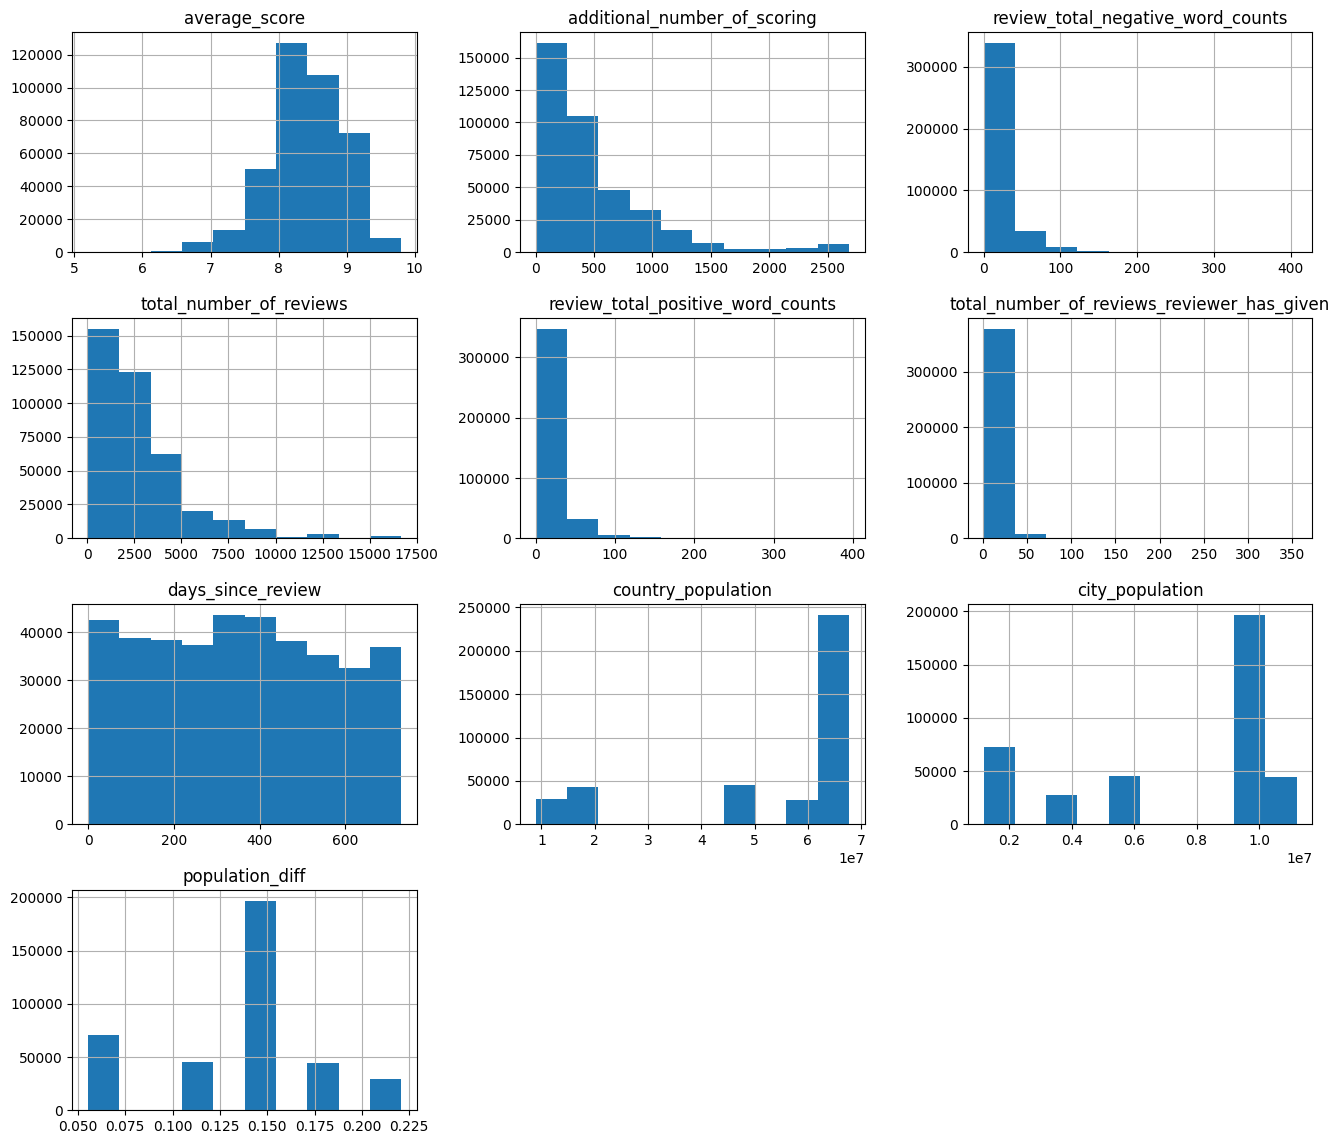

In [716]:
data[num_cols].hist(figsize=(16,14));


In [717]:
corr = data[num_cols].corr()
corr

,average_score,additional_number_of_scoring,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,country_population,сity_population,population_diff
average_score,1.000000,-0.152854,-0.113152,-0.180213,0.106516,0.036172,-0.014403,-0.086827,-0.079325,0.023929
additional_number_of_scoring,-0.152854,1.000000,0.029536,0.824467,-0.052254,-0.072207,0.012766,0.218552,0.193736,-0.038623
review_total_negative_word_counts,-0.113152,0.029536,1.000000,0.035233,0.119284,0.001804,-0.042077,0.006525,0.003524,-0.013544
total_number_of_reviews,-0.180213,0.824467,0.035233,1.000000,-0.029557,-0.025708,0.007827,-0.018725,-0.098231,-0.172896
review_total_positive_word_counts,0.106516,-0.052254,0.119284,-0.029557,1.000000,0.026604,-0.045617,-0.046410,-0.042193,-0.011977
total_number_of_reviews_reviewer_has_given,0.036172,-0.072207,0.001804,-0.025708,0.026604,1.000000,0.036029,-0.061307,-0.069385,0.009555
days_since_review,-0.014403,0.012766,-0.042077,0.007827,-0.045617,0.036029,1.000000,0.009722,0.017255,0.026385
country_population,-0.086827,0.218552,0.006525,-0.018725,-0.046410,-0.061307,0.009722,1.000000,0.891393,0.079402
сity_population,-0.079325,0.193736,0.003524,-0.098231,-0.042193,-0.069385,0.017255,0.891393,1.000000,0.436449
population_diff,0.023929,-0.038623,-0.013544,-0.172896,-0.011977,0.009555,0.026385,0.079402,0.436449,1.000000


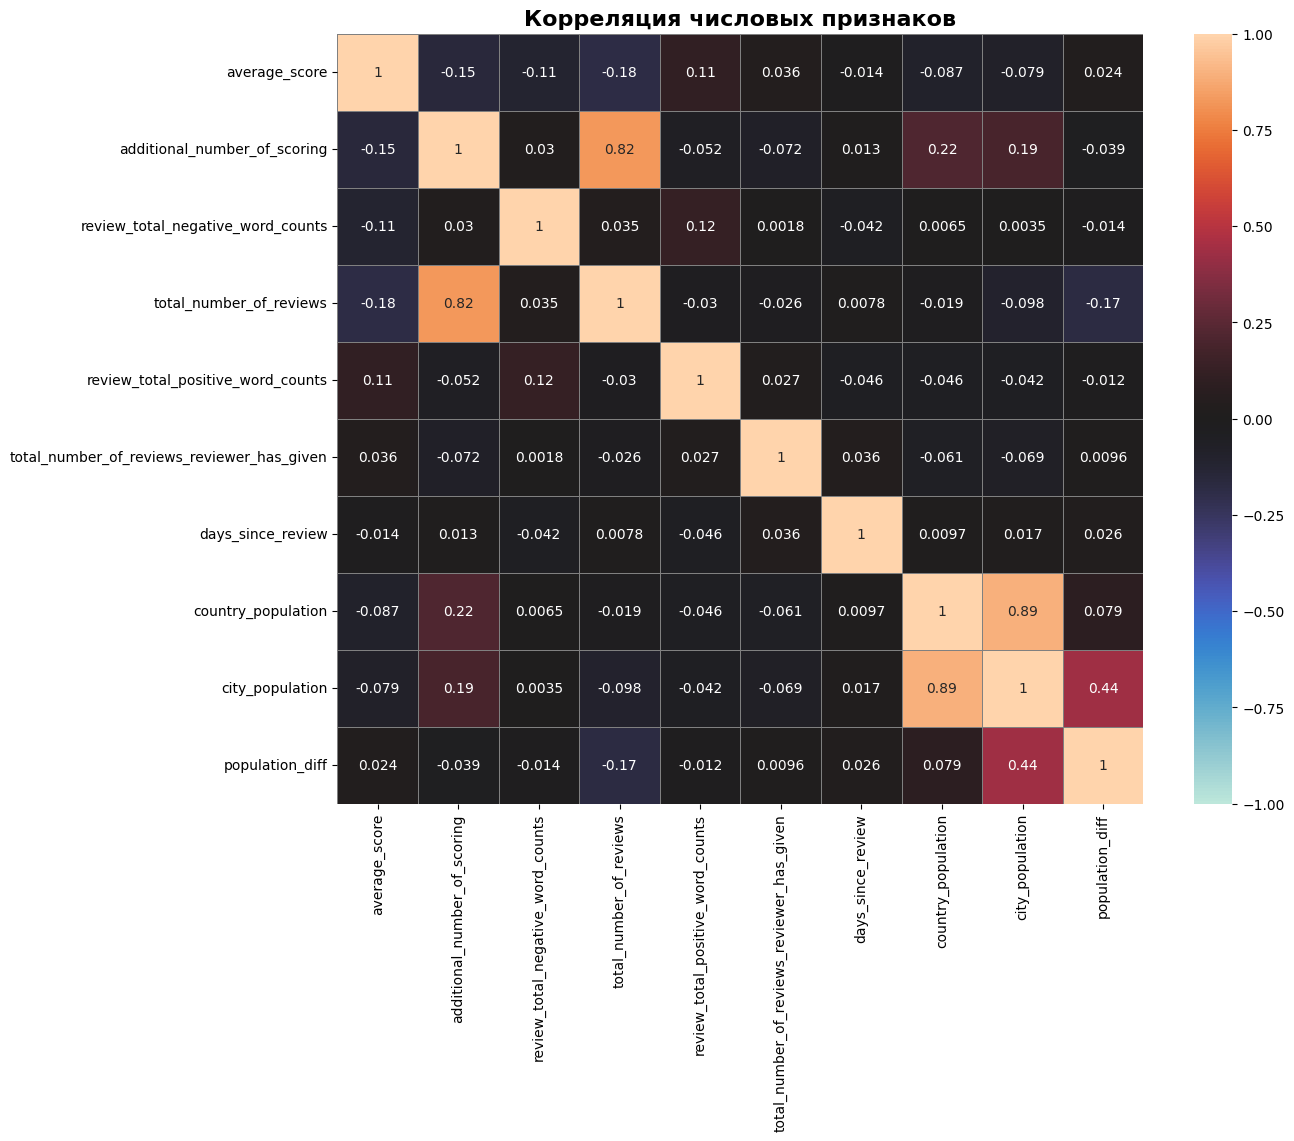

In [718]:
plt.subplots(figsize=(13,10))
heatmap = sns.heatmap(
    corr, 
    annot=True, 
    linewidths=0.5, 
    vmin=-1, 
    vmax=1, 
    center= 0, 
    linecolor='grey')
heatmap.set_title('Корреляция числовых признаков', fontweight='bold', size=16);

Анализ категориальных признаков

In [719]:
corr = data[cat_cols].corr(method='spearman')


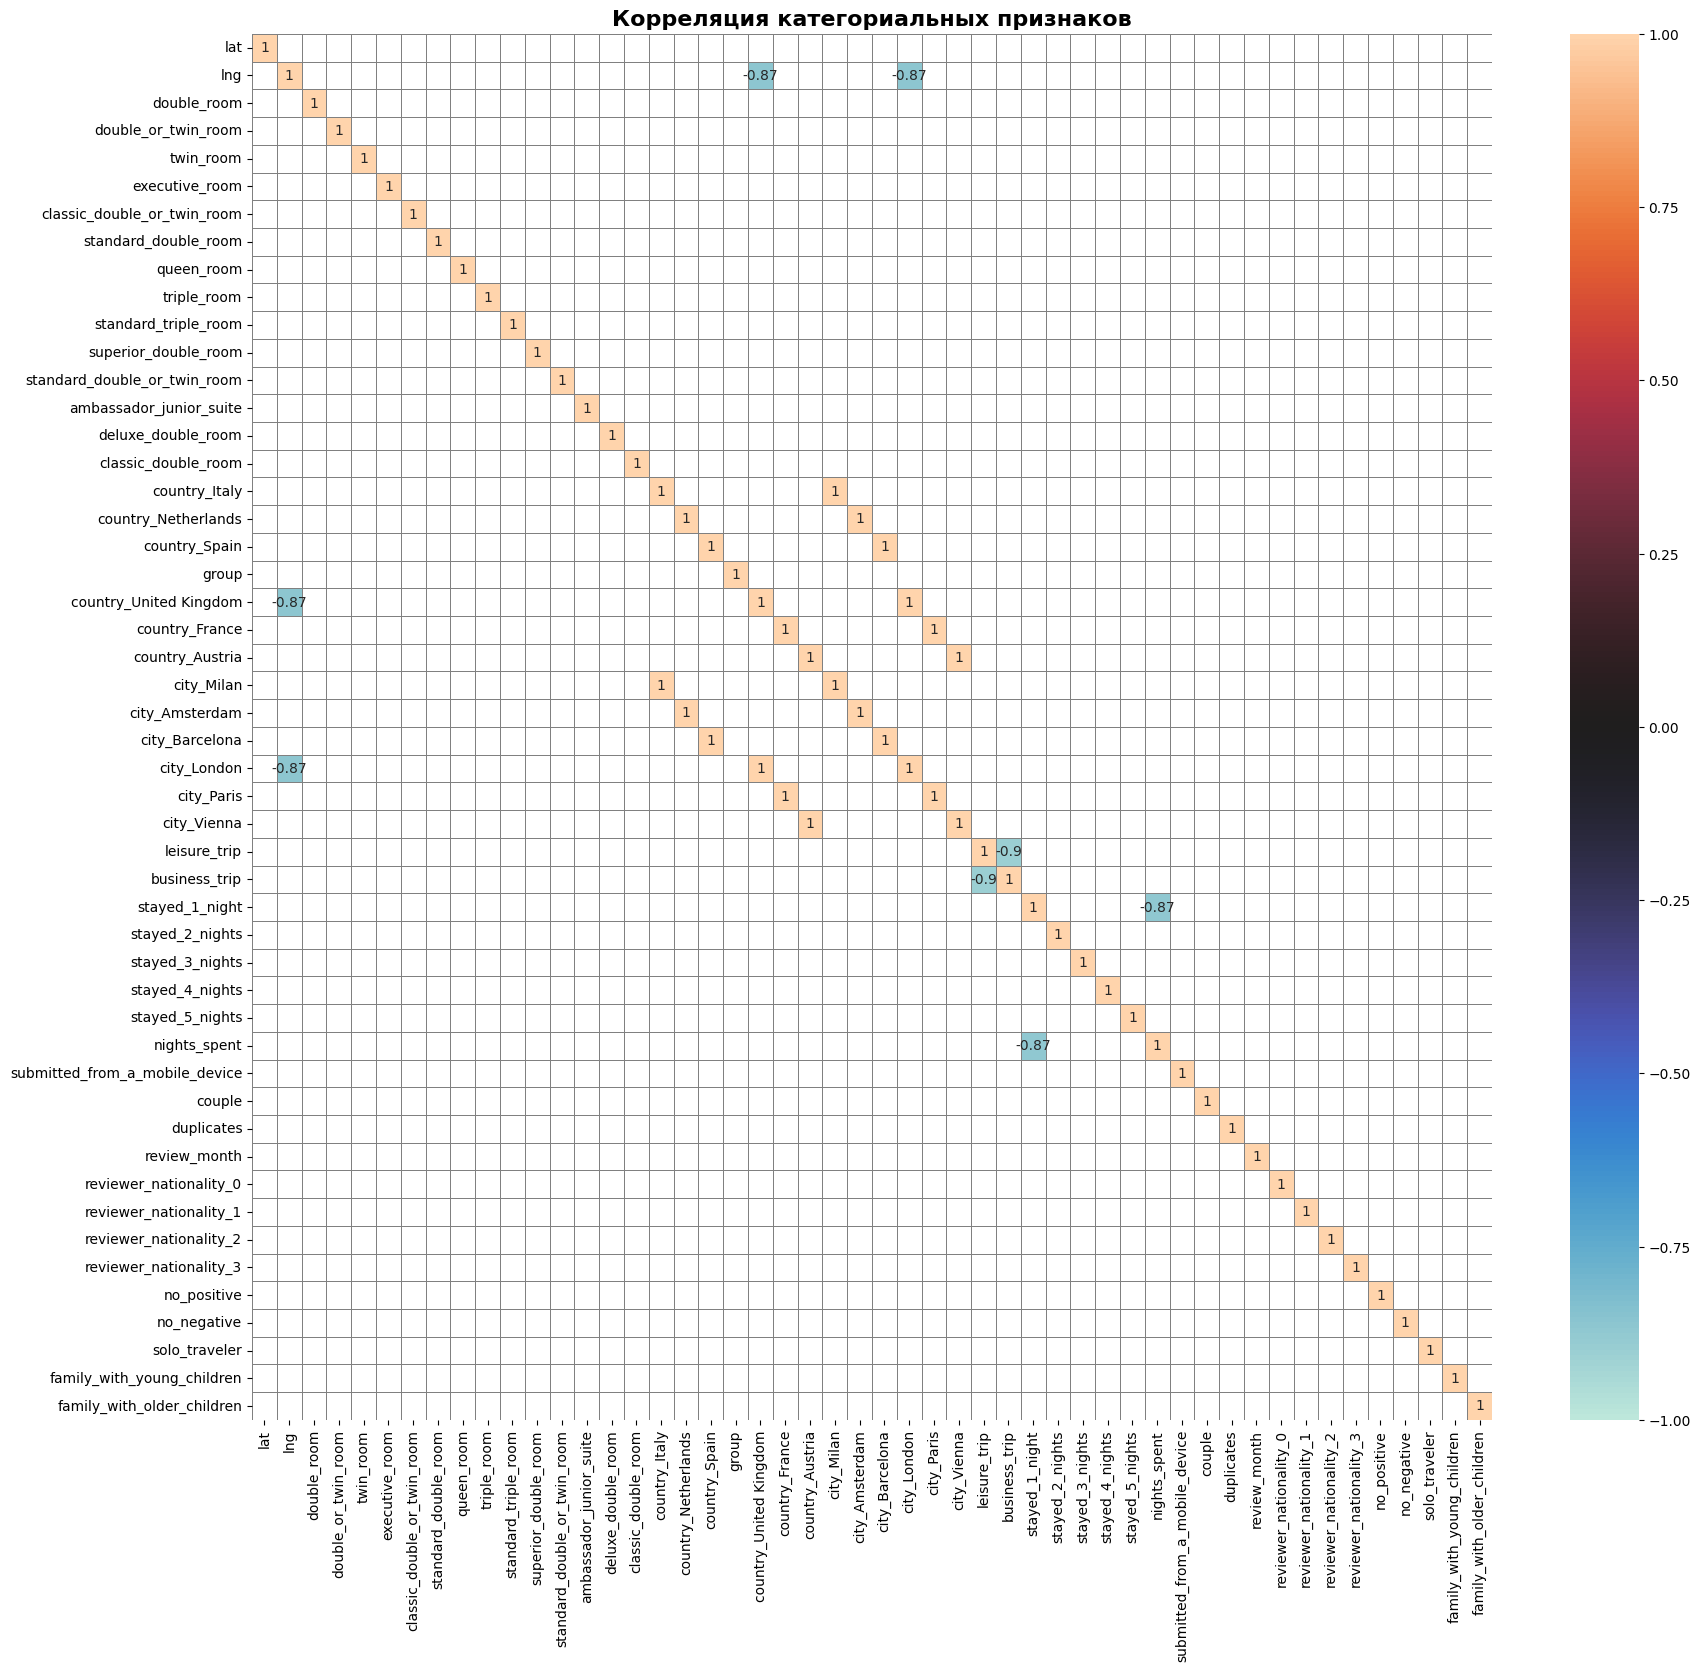

In [720]:

corr = corr[np.abs(corr) >= 0.8]

plt.subplots(figsize=(20,18))
heatmap = sns.heatmap(
    corr, 
    annot=True, 
    linewidths=0.5, 
    vmin=-1, 
    vmax=1, 
    center= 0, 
    linecolor='grey')
heatmap.set_title('Корреляция категориальных признаков', fontweight='bold', size=16);

In [721]:
# Чтобы исключить мультиколлениарность, удалим сильно коррелирующие признаками
pivot = data.corr()
#pivot = pivot.drop('sample', axis=0)
#pivot = pivot.drop('sample', axis=1)
for col in pivot:
    pivot[col] = pivot[col].apply(lambda x: np.nan if (abs(x) < 0.72 or x == 1) else x)
for col in pivot:
    pivot = pivot.dropna(how='all')
    pivot = pivot.dropna(how='all', axis='columns')

# Постараемся удалить минимальное количество признаков - удаляем признаки с максимальной корреляцией
print('Признаки, которые были удалены:')
counter = 0
for lower_bound in np.linspace(0.98, 0.72, num=14):
    for col in pivot:
        if pivot[col].max() > lower_bound or pivot[col].min() < -lower_bound:
            print(col)
            pivot = pivot.drop(col, axis=0)
            pivot = pivot.drop(col, axis=1)
            data = data.drop(col, axis=1)
            counter += 1

Признаки, которые были удалены:
leisure_trip
country_population
lat
additional_number_of_scoring
lng
reviewer_nationality_2


In [722]:
list(data.columns)

['average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'days_since_review',
 'duplicates',
 'сity_population',
 'population_diff',
 'city_Amsterdam',
 'city_Barcelona',
 'city_London',
 'city_Milan',
 'city_Paris',
 'city_Vienna',
 'country_Austria',
 'country_France',
 'country_Italy',
 'country_Netherlands',
 'country_Spain',
 'country_United Kingdom',
 'review_month',
 'reviewer_nationality_0',
 'reviewer_nationality_1',
 'reviewer_nationality_3',
 'no_negative',
 'no_positive',
 'submitted_from_a_mobile_device',
 'couple',
 'stayed_1_night',
 'stayed_2_nights',
 'solo_traveler',
 'stayed_3_nights',
 'business_trip',
 'group',
 'executive_room',
 'family_with_young_children',
 'stayed_4_nights',
 'double_room',
 'standard_double_room',
 'superior_double_room',
 'queen_room',
 'family_with_older_children',
 'deluxe_double_room',
 'double_or_twin_room',

In [723]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = data.drop(['reviewer_score'], axis = 1)  
y = data['reviewer_score'] 

In [724]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [725]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [727]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.9186896662564672
